<a href="https://colab.research.google.com/github/hafsaaaaaaaa/MLPROJECT_/blob/main/iris_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
iris=load_iris()


In [55]:
X = iris.data #here x is the feature matrix which have input features for prediction.
y = iris.target # y is a target variable which we used for prediction.

In [40]:
dir(iris)
#it is used to list method and attribute available for object.

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [41]:
iris.feature_names
#here we have features name... there are 4 features we have in our dataset..

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [42]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()
#here we create pandas data frame call df from the feature data of iris and assigning coulumn name..
#head is used to show us few rows and columns...

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
df['target']=iris.target
df.head()

#here we add target column so we can easily understand and for data exploration.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
df.shape

#it is used to determine the dimensions and shape of a dataframe..
# here we have 150 rows and 5 columns..

(150, 5)

In [45]:
df.info()
#here we have summary of data frame.. we have information of non-null values, data types,memory usage and more.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [46]:
df.dropna(inplace=True)
#here we drop nan value from rows and columns..

In [47]:
df.isnull().sum()
#this code will count the number of missing nan values from columns..

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#here we split data into training and testing sets......

In [49]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
#here model is goining to be fit....

GaussianNB()

In [50]:
y_pred = naive_bayes.predict(X_test)
#here we make prediction on test data.now y pred contain the predicted labels for the test data..

In [51]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
#these will help us tp assess the performance of our classification model...

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



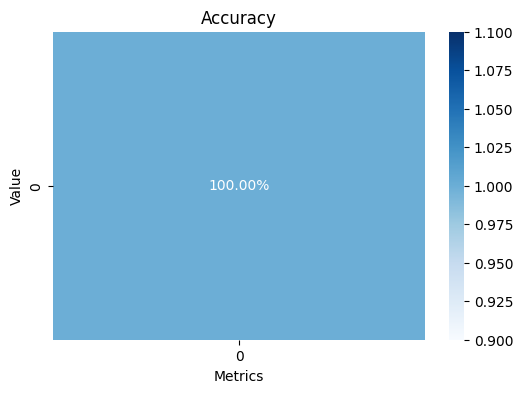

In [52]:
plt.figure(figsize=(6, 4))
sns.heatmap([[accuracy]], annot=True, cmap='Blues', fmt='.2%')
plt.title("Accuracy")
plt.xlabel("Metrics")
plt.ylabel("Value")
plt.show()
#here we use matplotlib and seaborn to create and display a heatmap that visualize the accuracy of our model...

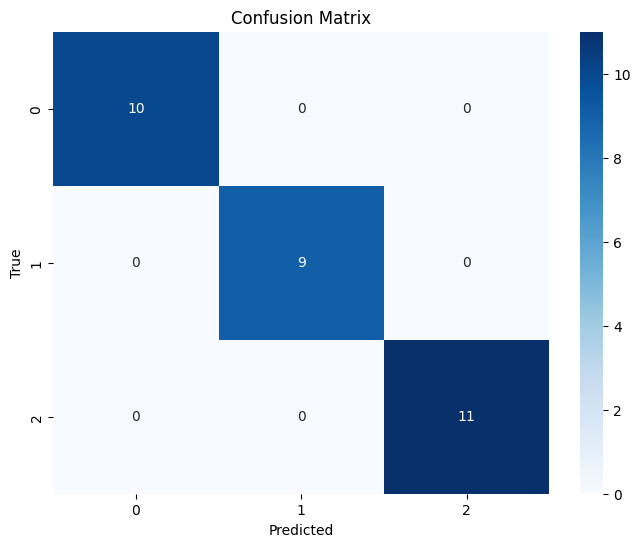

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
#same using matplotlib and seaborn we will visualize the confusion matrix..

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



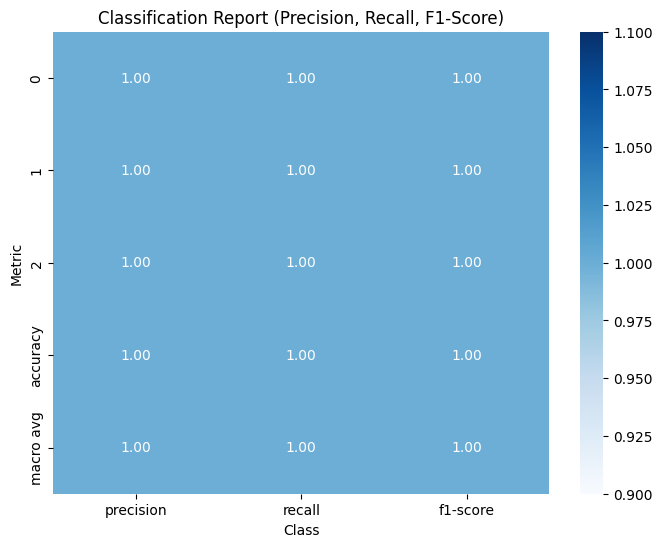

In [54]:
print("Classification Report:\n", classification_rep)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap='Blues', fmt='.2f')
plt.title("Classification Report (Precision, Recall, F1-Score)")
plt.xlabel("Class")
plt.ylabel("Metric")
plt.show()
#here we visualize precision,recall,f1_score from classification report.....